<a href="https://colab.research.google.com/github/Jash-Bhatia/SM_2/blob/master/SM_PCA_practice_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## When using this dataset, make required changes in code according to its shape

##from sklearn.datasets import load_digits
##digits = load_digits()
##print(digits.data.shape)

##plt.gray() 
##plt.matshow(digits.images[2]) 
##plt.show() 

In [2]:
!unzip /content/mnist_train.csv.zip
!unzip /content/mnist_test.csv.zip

Archive:  /content/mnist_train.csv.zip
replace mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/mnist_test.csv.zip
replace mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

In [6]:
X_train = train.iloc[:,1:785]
X_train.shape

(60000, 784)

In [7]:
y_train = train.iloc[:,0]

In [8]:
X_test = test.iloc[:,1:785]

In [9]:
y_test = test.iloc[:,0]

In [10]:
img = X_train.to_numpy()

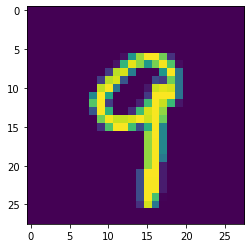

In [11]:
plt.imshow(img[9998,].reshape(28,28))

# **Classification on Dataset without PCA**

## LOGISTIC


In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logi = LogisticRegression(random_state=0)
logi.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = logi.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0    9    7   10   34]
 [  11    2    1   33   11  776   11    6   35    6]
 [   9    3    7    3    7   16  910    2    1    0]
 [   1    6   24    5    7    1    0  951    3   30]
 [   8    7    6   23    6   26   10   10  869    9]
 [   9    7    0   11   25    6    0   22    7  922]]


0.9255

## LDA

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [17]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [18]:
predict1 = lda.predict(X_test)

In [19]:
cm1 = confusion_matrix(y_test,predict1)
print(cm)
accuracy_score(y_test,predict1)

[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0    9    7   10   34]
 [  11    2    1   33   11  776   11    6   35    6]
 [   9    3    7    3    7   16  910    2    1    0]
 [   1    6   24    5    7    1    0  951    3   30]
 [   8    7    6   23    6   26   10   10  869    9]
 [   9    7    0   11   25    6    0   22    7  922]]


0.873

## NEURAL NETWORK

In [20]:
from keras import layers
from keras import models
from keras.utils import to_categorical

In [21]:
nn = models.Sequential()

In [22]:
nn.add(layers.Dense(units=128, activation='relu', input_shape=(784,)))
nn.add(layers.Dense(units=256, activation='relu'))
nn.add(layers.Dense(units = 10, activation = 'softmax'))

In [23]:
nn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
Y_train = to_categorical(y_train)
print(Y_train.shape)

Y_test = to_categorical(y_test)
Y_test.shape

(60000, 10)


(10000, 10)

In [25]:
nn_fit = nn.fit(X_train, Y_train, batch_size = 500, epochs = 10)

Epoch 1/10
120/120 [==============================] - 1s 12ms/step - loss: 4.3773 - accuracy: 0.8309
Epoch 2/10
120/120 [==============================] - 1s 12ms/step - loss: 0.6667 - accuracy: 0.9197
Epoch 3/10
120/120 [==============================] - 1s 12ms/step - loss: 0.3831 - accuracy: 0.9445
Epoch 4/10
120/120 [==============================] - 1s 12ms/step - loss: 0.2745 - accuracy: 0.9570
Epoch 5/10
120/120 [==============================] - 1s 12ms/step - loss: 0.2070 - accuracy: 0.9654
Epoch 6/10
120/120 [==============================] - 1s 12ms/step - loss: 0.1590 - accuracy: 0.9721
Epoch 7/10
120/120 [==============================] - 1s 12ms/step - loss: 0.1369 - accuracy: 0.9761
Epoch 8/10
120/120 [==============================] - 1s 12ms/step - loss: 0.1138 - accuracy: 0.9793
Epoch 9/10
120/120 [==============================] - 1s 12ms/step - loss: 0.0975 - accuracy: 0.9828
Epoch 10/10
120/120 [==============================] - 1s 12ms/step - loss: 0.0821 - accura

In [26]:
nn.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.9665


[0.3501676321029663, 0.9664999842643738]

In [27]:
pd.DataFrame(nn.predict(X_test)).head(10)

,0,1,2,3,4,5,6,7,8,9
0,1.678709e-29,4.030706e-27,2.205469e-21,1.582704e-20,5.547677e-37,3.246119e-37,1.968469e-33,1.000000e+00,3.293302e-23,1.525118e-26
1,2.834224e-36,2.557057e-25,1.000000e+00,3.011520e-28,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.160523e-29,0.000000e+00
2,1.368101e-22,1.000000e+00,9.531731e-17,1.226890e-13,2.026357e-19,5.467658e-27,1.542186e-22,1.393852e-19,2.549492e-15,9.055275e-28
3,1.000000e+00,0.000000e+00,3.637806e-25,2.264507e-36,2.974389e-22,2.164241e-27,5.744281e-20,4.720491e-33,3.798114e-35,4.680147e-26
4,1.405041e-28,3.732371e-22,2.864605e-28,3.531044e-29,1.000000e+00,2.001718e-27,1.449613e-29,1.508273e-15,1.319425e-20,4.905823e-09
5,1.951999e-22,1.000000e+00,6.785391e-23,7.144192e-14,1.436209e-16,2.598032e-22,8.907608e-21,1.735468e-15,1.503362e-14,1.745374e-22
6,0.000000e+00,5.370234e-35,0.000000e+00,0.000000e+00,1.000000e+00,1.161611e-36,0.000000e+00,1.264571e-32,1.637529e-28,3.781449e-18
7,1.602827e-16,1.547908e-12,1.126951e-09,1.100304e-05,7.841594e-02,3.684472e-06,2.871219e-19,3.225471e-08,1.550327e-03,9.200190e-01
8,1.638334e-36,0.000000e+00,0.000000e+00,0.000000e+00,5.481341e-33,1.000000e+00,1.209471e-27,0.000000e+00,2.611524e-16,7.753626e-15
9,6.391660e-26,4.344126e-26,4.301899e-31,4.050500e-18,1.428542e-13,4.568626e-27,3.301887e-27,4.747394e-12,1.073975e-12,1.000000e+00


In [28]:
pd.DataFrame(Y_test).head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **Classification on Dataset with PCA**


## PCA on Dataset

In [29]:
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [30]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=100)
pca1.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

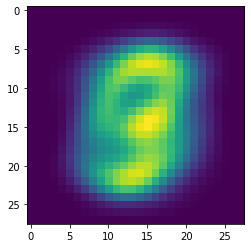

In [31]:
plt.imshow(pca1.mean_.reshape(28,28))

In [32]:
pca1.components_.shape

(100, 784)

In [33]:
print(pca1.explained_variance_)

[332724.66744657 243283.9390705  211507.36705827 184776.38586219
 166926.83131066 147844.96167532 112178.20271178  98874.42962709
  94696.24905304  80809.82453194  72313.62025956  69358.30132663
  58826.87114941  58014.08401663  54123.75694848  50843.06852651
  45412.606306    43778.45913134  40705.3404521   39519.79037816
  36553.53585874  34515.19387472  32693.28605593  31286.58580933
  30287.55259254  28776.07832963  27859.28538476  26960.58134095
  25533.19355099  23686.12288088  22562.76183737  22221.76624611
  20660.67151476  20110.98492565  19543.19986275  18638.29183079
  17340.89911223  16726.24204843  16505.81263426  16191.66227458
  15659.57813625  15251.21299319  14348.32656022  13652.80460644
  13198.84517605  12860.41798926  12411.468408    12054.29807337
  11658.86927196  11035.45765826  10937.46282927  10724.37413684
  10147.7078138    9906.78032476   9741.32497869   9306.07669132
   9240.21990595   8861.50056433   8700.33676754   8391.97440422
   8245.08854264   8202.7

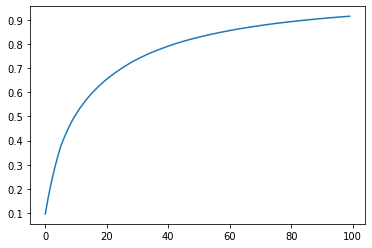

In [34]:
plt.plot(np.cumsum(pca1.explained_variance_ratio_))


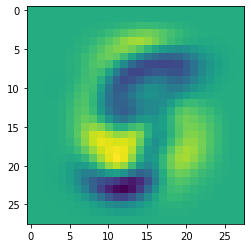

In [35]:
plt.imshow(pca1.components_[3].reshape(28,28))

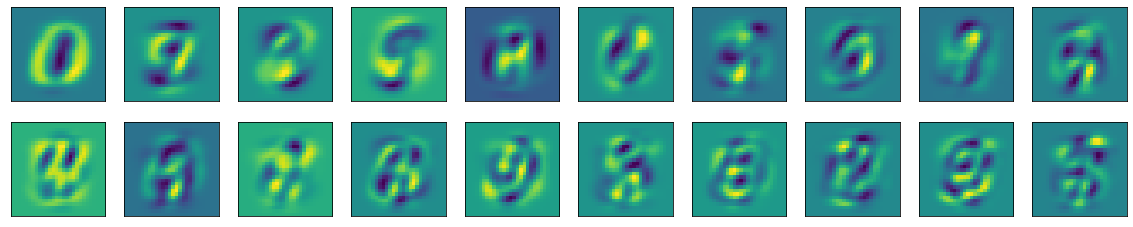

In [36]:
fig = plt.figure(figsize=(20,6))      ##printing top 10 E.faces
for i in range(20):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca1.components_[i].reshape(28,28))

In [37]:
X_train_pca = pca1.fit_transform(X_train)  ##omega  ##X_train for NN

X_test_pca = pca1.transform(X_test)   ##X_test for NN

print(X_train_pca.shape)
print(X_test_pca.shape)

(60000, 100)
(10000, 100)


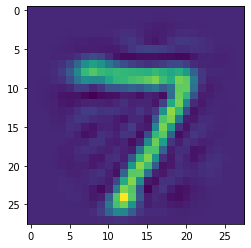

In [38]:
inv_proj3 = pca1.inverse_transform(X_test_pca)
plt.imshow(inv_proj3[0].reshape(28,28))

## Logi on PCA Dataset

In [39]:
logi = LogisticRegression(random_state=0)
logi.fit(X_train_pca,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = logi.predict(X_test_pca)

In [41]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[ 959    0    3    1    1    4    9    2    1    0]
 [   0 1105    2    3    1    1    4    2   17    0]
 [  12   11  921   13    8    5   13   11   30    8]
 [   5    1   19  913    2   27    5   12   15   11]
 [   2    3    5    1  908    1   12    2    8   40]
 [   9    4    6   37   10  767   19    5   26    9]
 [  11    4    6    1    8   10  913    2    3    0]
 [   3   10   18    6    8    1    0  948    1   33]
 [   6   15    7   33   13   34   14   15  828    9]
 [  12    6    1   10   34    5    0   27    5  909]]


0.9171

## LDA on PCA Dataset

In [42]:
lda.fit(X_train_pca, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [43]:
y_pred = lda.predict(X_test_pca)

In [44]:
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

accuracy_score(y_test, y_pred)

[[ 928    0    3    3    0   22   12    2    9    1]
 [   0 1090    3    2    1    3    4    1   31    0]
 [  13   38  829   25   21    7   16   12   57   14]
 [   4    8   24  871    3   39    4   20   25   12]
 [   0   11    3    0  882    4   12    1    7   62]
 [  11    9    3   50   11  717   16   17   42   16]
 [  10    8    5    0   18   29  880    0    8    0]
 [   2   31   18    6   16    3    2  871    4   75]
 [   6   28    6   31   17   39   13    9  798   27]
 [   8    8    3   11   44    6    3   15   12  899]]


0.8765

## Neural Network on PCA Dataset

In [45]:
nn1 = models.Sequential()

In [46]:
nn1.add(layers.Dense(units=128, activation='relu', input_shape = (100,)))
nn1.add(layers.Dense(units = 256, activation='relu'))
nn1.add(layers.Dense(units = 10, activation='softmax'))

In [47]:
nn1.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [48]:
nn1.fit(X_train_pca, Y_train, batch_size=500, epochs = 10)

Epoch 1/10
120/120 [==============================] - 1s 7ms/step - loss: 9.2962 - accuracy: 0.8220
Epoch 2/10
120/120 [==============================] - 1s 6ms/step - loss: 1.7504 - accuracy: 0.9322
Epoch 3/10
120/120 [==============================] - 1s 6ms/step - loss: 0.8791 - accuracy: 0.9543
Epoch 4/10
120/120 [==============================] - 1s 6ms/step - loss: 0.5408 - accuracy: 0.9659
Epoch 5/10
120/120 [==============================] - 1s 6ms/step - loss: 0.3449 - accuracy: 0.9747
Epoch 6/10
120/120 [==============================] - 1s 6ms/step - loss: 0.2511 - accuracy: 0.9794
Epoch 7/10
120/120 [==============================] - 1s 6ms/step - loss: 0.2069 - accuracy: 0.9823
Epoch 8/10
120/120 [==============================] - 1s 6ms/step - loss: 0.1622 - accuracy: 0.9857
Epoch 9/10
120/120 [==============================] - 1s 6ms/step - loss: 0.1312 - accuracy: 0.9876
Epoch 10/10
120/120 [==============================] - 1s 6ms/step - loss: 0.1045 - accuracy: 0.9894

In [49]:
nn1.evaluate(X_test_pca, Y_test)

313/313 [==============================] - 0s 963us/step - loss: 0.7407 - accuracy: 0.9658


[0.7406567335128784, 0.9657999873161316]

In [50]:
pd.DataFrame(nn1.predict(X_test_pca)).head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,1.0,0.000000e+00,1.351574e-37,0.000000e+00,1.777032e-28,2.817626e-34,6.294109e-32,6.565836e-34,0.000000e+00
3,1.000000e+00,0.0,2.139077e-26,0.000000e+00,0.000000e+00,0.000000e+00,3.111144e-38,0.000000e+00,0.000000e+00,3.710654e-28
4,0.000000e+00,0.0,1.221240e-32,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.061258e-33,2.155983e-28,1.342360e-24
5,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.115374e-34,0.000000e+00,0.000000e+00
6,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.517952e-38,0.000000e+00,0.000000e+00,6.016133e-31,5.221733e-13
7,0.000000e+00,0.0,0.000000e+00,1.222368e-32,7.527794e-35,0.000000e+00,0.000000e+00,4.899528e-36,0.000000e+00,1.000000e+00
8,1.698118e-33,0.0,1.176841e-32,0.000000e+00,1.948241e-16,1.000000e+00,0.000000e+00,0.000000e+00,2.705055e-13,0.000000e+00
9,0.000000e+00,0.0,0.000000e+00,0.000000e+00,9.234677e-22,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [51]:
pd.DataFrame(Y_test).head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
